In [63]:
#General libraries

import numpy as np
import pandas as pd

#Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
path = "D:\programming project feb 2024\Spain Energy Dataset\df_electricity_cleaned.csv"
#Reading our Dataset
df_viz=pd.read_csv(path)
#Showing first five values from the dataset
df_viz.head()

,time,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [65]:
# create a "box with mustache" diagram"
#plt.figure(figsize=(5,3))
#sns.boxplot(data=df_viz, x='time', y='price actual')
#plt.title('Stats by gender');

In [66]:
df_viz["time"]=pd.to_datetime(df_viz["time"], utc=True)
df_viz = df_viz.set_index('time')

In [67]:
#Set timeframe data for easier accessing
df_viz["year"]=df_viz.index.year
df_viz["month"]=df_viz.index.month
df_viz["month_name"]=df_viz.index.month_name()
df_viz["weekdays"] = df_viz.index.day_name()

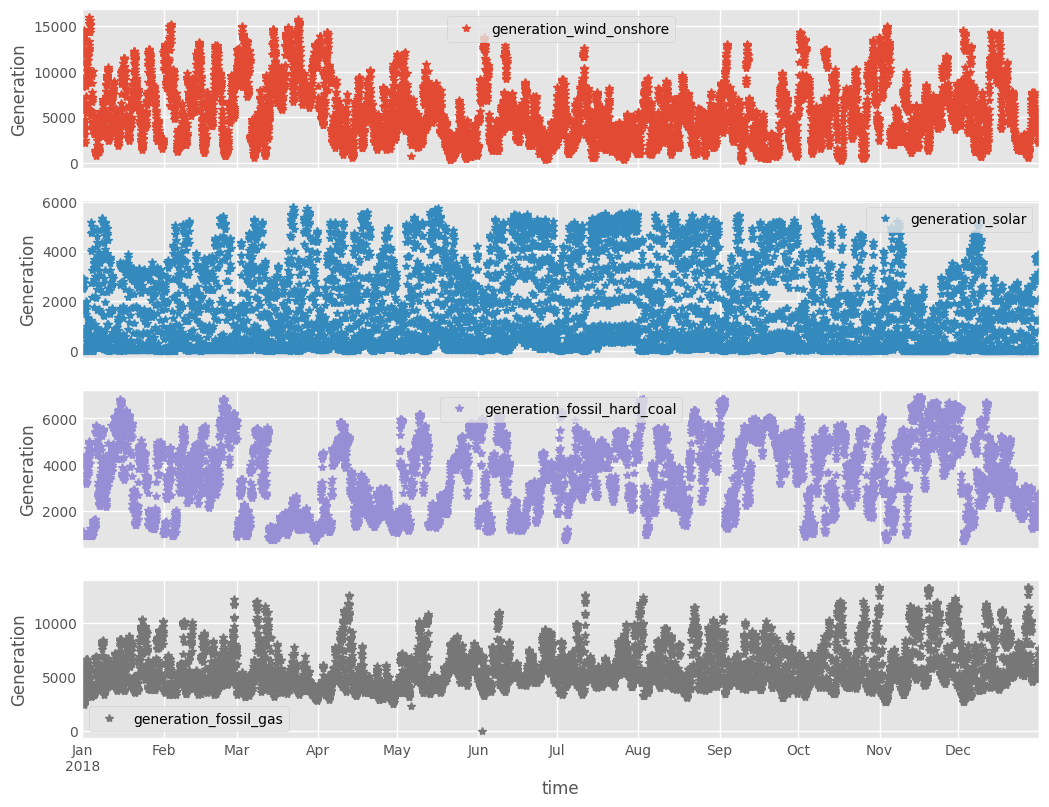

In [68]:
plt.style.use("ggplot")
cols_plot = ["generation_wind_onshore","generation_solar","generation_fossil_hard_coal","generation_fossil_gas"]
axes=df_viz[cols_plot].loc["2018-01":"2018-12"].plot(marker="*", linestyle= "None", subplots= True, figsize=(11,9))
for ax in axes:
    ax.set_ylabel('Generation')

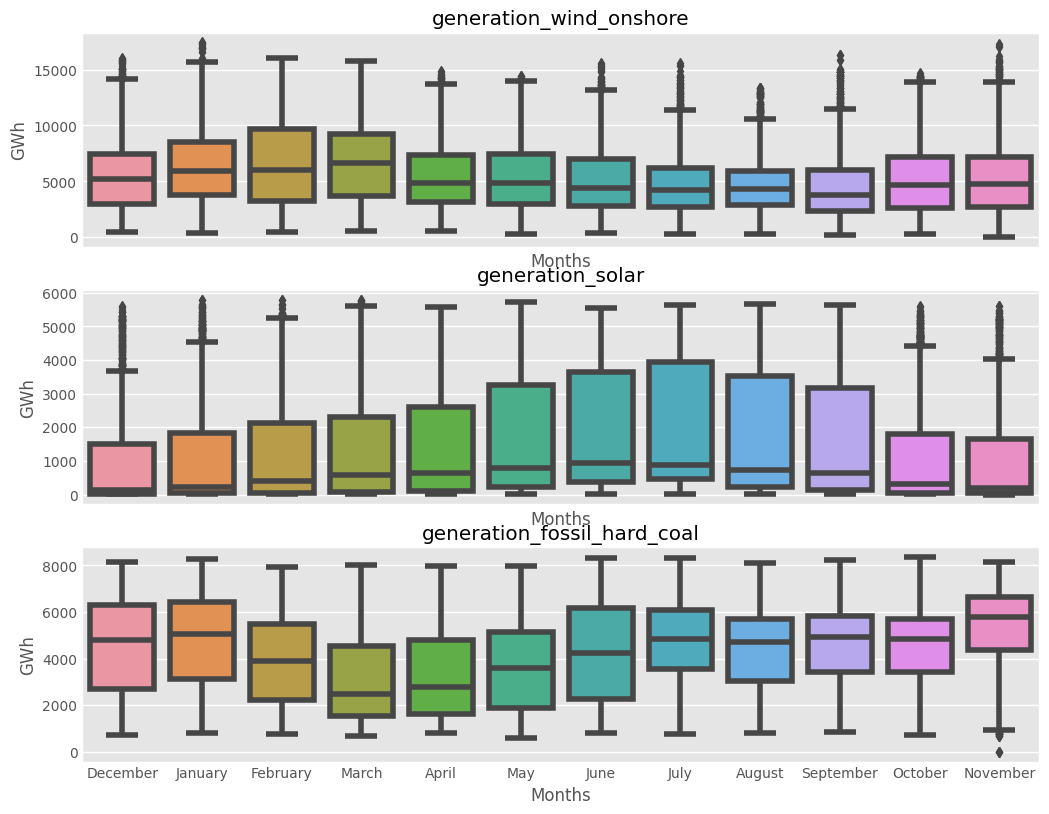

In [69]:
fig, axes=plt.subplots(3, 1, figsize=(11,9), sharex=True)
for name, ax in zip(["generation_wind_onshore","generation_solar","generation_fossil_hard_coal","generation_fossil_gas"], axes):
    sns.boxplot(data=df_viz, x='month_name', y=name, ax=ax )
    ax.set_ylabel('GWh')
    ax.set_xlabel("Months")
    ax.set_title(name)

In [70]:
monthly_mean=df_viz["price_actual"].resample("m").mean()
weekly_mean=df_viz["price_actual"].resample("w").mean()
daily_mean=df_viz["price_actual"].resample("d").mean()

<Figure size 1100x1000 with 0 Axes>

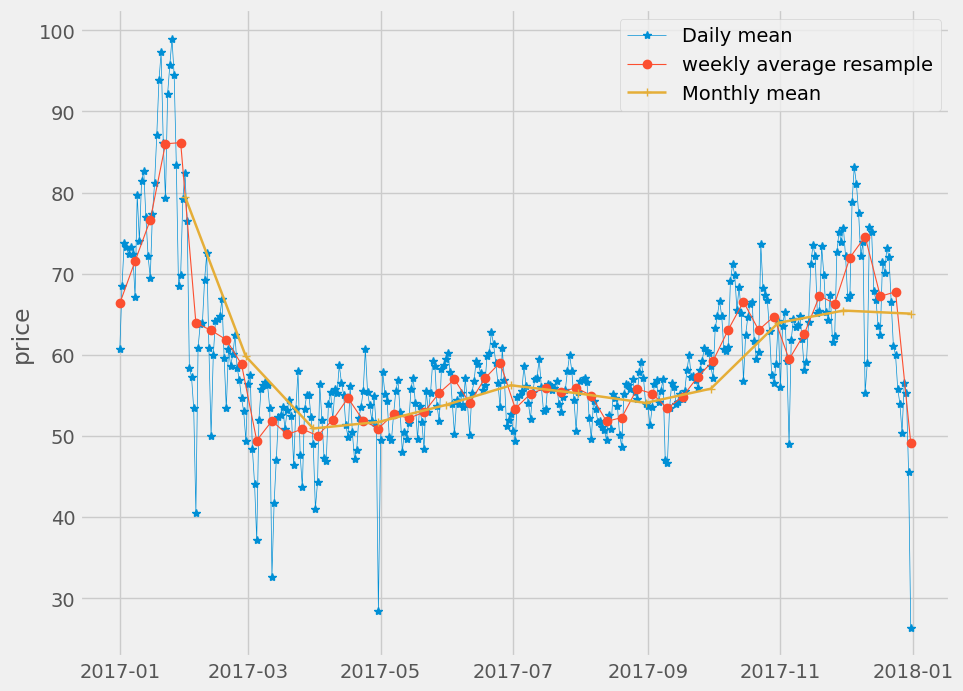

In [71]:
plt.figure(figsize=[11,10])
plt.style.use("fivethirtyeight")
Price_plot = ["price_actual","price_day_ahead"]
fig,ax=plt.subplots(figsize=[10,8])
ax.plot(daily_mean.loc["2017-01":"2017-12"], marker="*", linewidth=0.5, label="Daily mean")
ax.plot(weekly_mean.loc["2017-01":"2017-12"], marker="o", linewidth=0.8, label="weekly average resample")
ax.plot(monthly_mean.loc["2017-01":"2017-12"], marker="+", linewidth=1.8, label="Monthly mean")
ax.set_ylabel("price")
ax.legend();

Text(0, 0.5, 'Price/MWH')

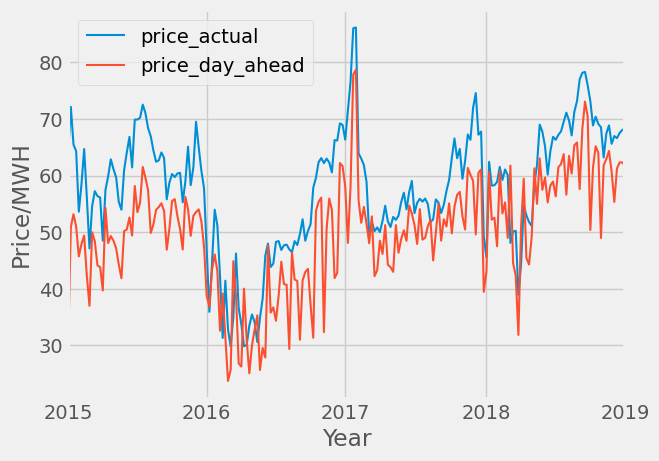

In [78]:
Price_plot = ["price_actual","price_day_ahead"]
df_viz[Price_plot].resample("w").mean().plot(kind="line",lw = 1.5)
plt.xlabel('Year')
plt.ylabel('Price/MWH')